In [13]:
!pip install kaggle --upgrade

https://www.kaggle.com/settings 로그인 상태에서 해당 경로의 API 항목의 create new token 버튼이 있는데 이를 누르면 json 파일이 다운로드됨. 아래 코드에서는 다운로드된 json파일을 업로드할 것

In [14]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"klamaa","key":"ac18c4f49c8d369175fe7f38a6c15d00"}'}

In [15]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [16]:
!ls -1ha kaggle.json

kaggle.json


In [17]:
!kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:07<00:00, 174MB/s]
100% 812M/812M [00:07<00:00, 121MB/s]


In [18]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [19]:
!unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [20]:
!unzip train.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       
  inflating: t

In [21]:
!unzip test1.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           
  inflating: t

In [22]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
print(os.listdir())

['.config', 'kaggle.json', 'test1', 'dogs-vs-cats.zip', 'test1.zip', 'train.zip', 'train', 'sampleSubmission.csv', 'sample_data']


In [23]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [24]:
filenames = os.listdir("/content/train")

In [25]:
filenames

['cat.7131.jpg',
 'cat.5426.jpg',
 'cat.1582.jpg',
 'dog.7638.jpg',
 'cat.7292.jpg',
 'cat.3943.jpg',
 'dog.11279.jpg',
 'cat.4796.jpg',
 'cat.126.jpg',
 'cat.1648.jpg',
 'dog.5447.jpg',
 'dog.8489.jpg',
 'cat.2793.jpg',
 'cat.7089.jpg',
 'cat.9893.jpg',
 'dog.9002.jpg',
 'cat.2353.jpg',
 'dog.9452.jpg',
 'cat.6970.jpg',
 'cat.3868.jpg',
 'dog.7700.jpg',
 'cat.4918.jpg',
 'cat.5895.jpg',
 'dog.4895.jpg',
 'dog.7105.jpg',
 'cat.8321.jpg',
 'dog.10510.jpg',
 'cat.11198.jpg',
 'cat.3199.jpg',
 'dog.4163.jpg',
 'cat.10523.jpg',
 'cat.1312.jpg',
 'dog.5851.jpg',
 'cat.4268.jpg',
 'cat.4787.jpg',
 'dog.12243.jpg',
 'dog.6427.jpg',
 'cat.6941.jpg',
 'dog.3697.jpg',
 'dog.7376.jpg',
 'dog.10702.jpg',
 'cat.10564.jpg',
 'cat.10383.jpg',
 'dog.2335.jpg',
 'dog.7015.jpg',
 'dog.978.jpg',
 'cat.9339.jpg',
 'cat.2013.jpg',
 'cat.4056.jpg',
 'cat.1039.jpg',
 'dog.1549.jpg',
 'dog.1442.jpg',
 'dog.2778.jpg',
 'cat.8670.jpg',
 'cat.907.jpg',
 'cat.5358.jpg',
 'cat.6775.jpg',
 'cat.1694.jpg',
 'cat.324

In [26]:
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)
df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [27]:
df.head()

filename  category
0  cat.7131.jpg         0
1  cat.5426.jpg         0
2  cat.1582.jpg         0
3  dog.7638.jpg         1
4  cat.7292.jpg         0

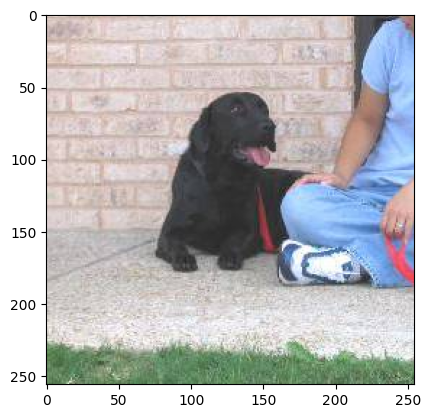

In [28]:
sample = random.choice(filenames)
image = load_img("/content/train/"+sample)
plt.imshow(image)

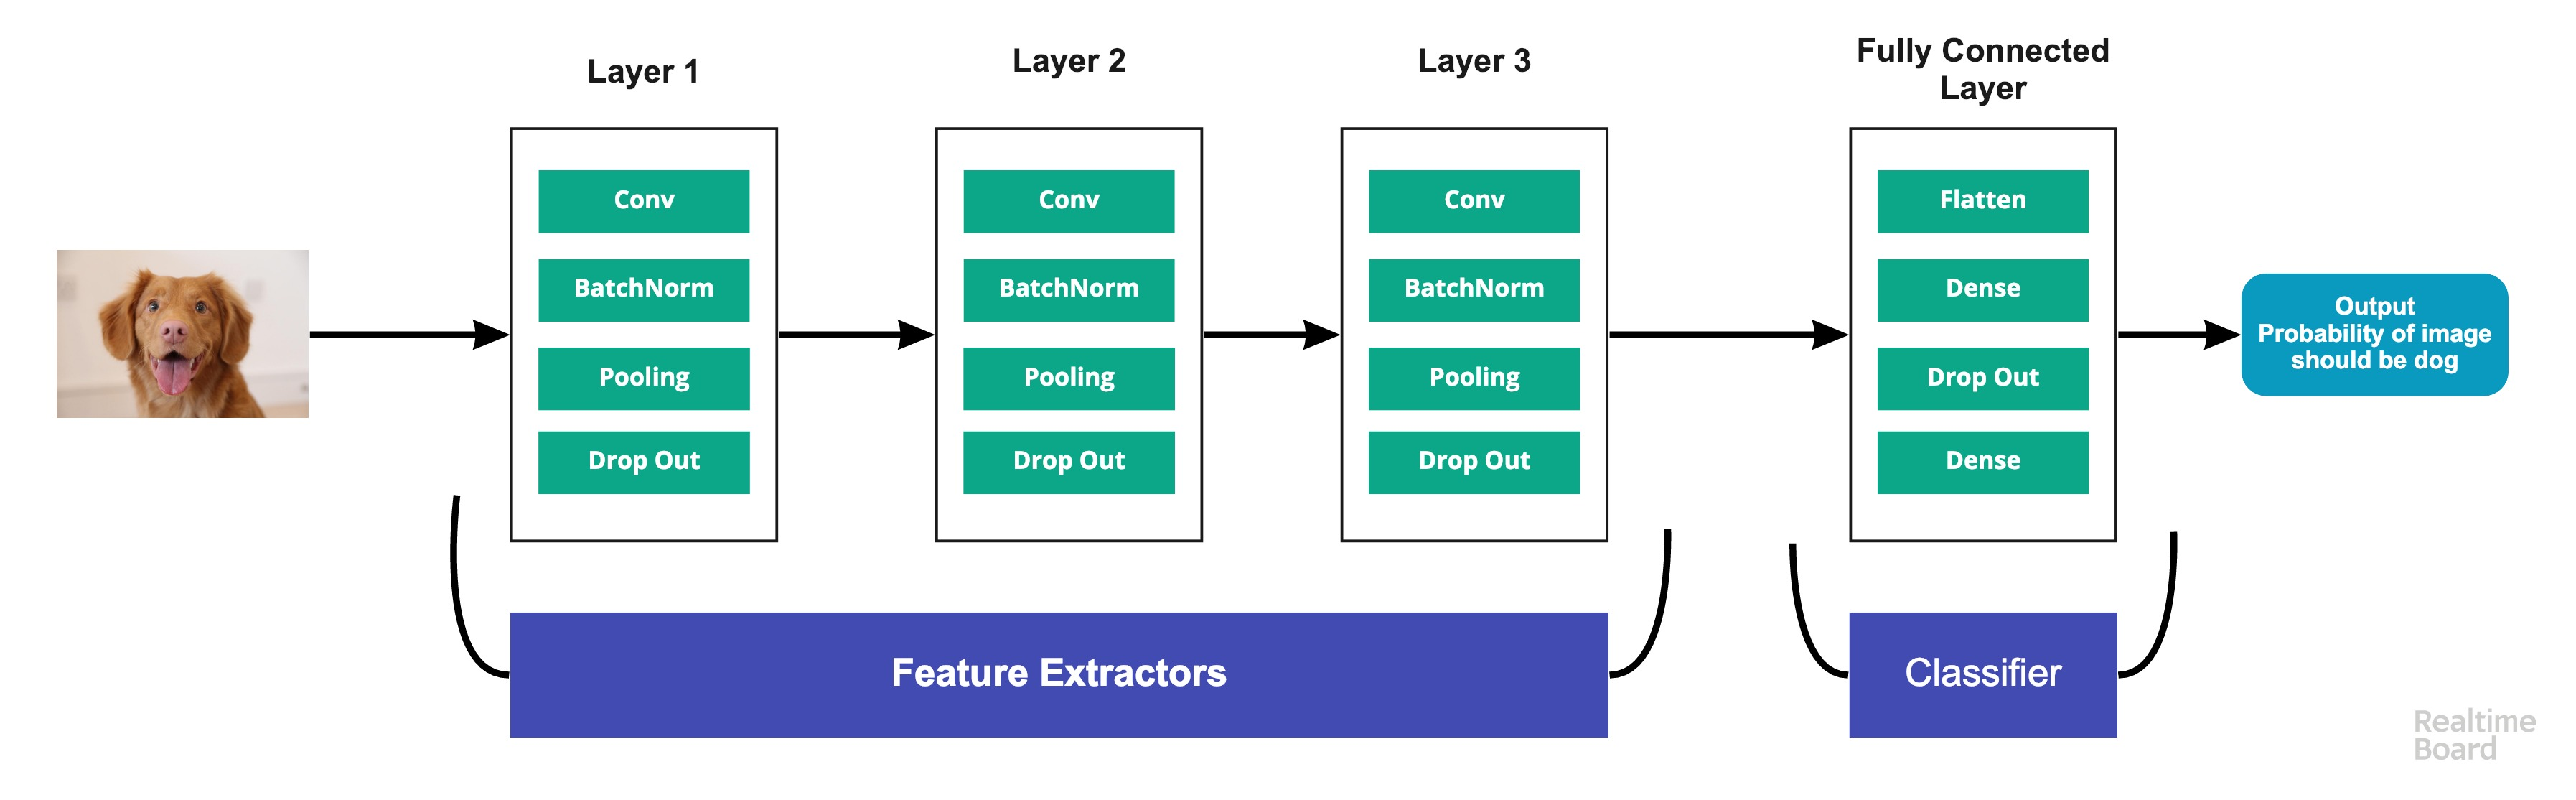

https://arxiv.org/pdf/1502.03167

In [65]:
# 배치정규화를 이용하여 학습의 속도 향상 및 안정성 증가
# 로컬 미니멈에 빠질 확률 감소
# 결론적으로 각각의 배치별로 정규화를 진행함=배치가 작을수록 많이 정규화를 진행함
# 데이터의 분포가 정규화되도록 만들게 됨

In [29]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu')) # 여기서는 필터가 2배씩 늘어남. 점차 줄이는 방식도 적용해도 됨
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [30]:
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)        2

In [31]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [32]:
earlystop = EarlyStopping(patience=10)

In [66]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)
# reduce learning rate(점차 학습율을 줄임)
# 위는 검증 정확도에 대해 초점을 잡아 모니터링을 진행함. 2에폭동안 개선되지 않으면 callback 호출
# 동적으로 학습율을 조절하여 학습을 진행하는 방법

# val 데이터의 정확도를 모니터링 할것이며, 2에폭동안 개선되지 않으면 콜백함수 호출
# 콜백함수가 호출되면 학습률(lr)을 0.5배로 적용하여 모델의 개선을 유도
# 학습율이 너무 크면 발산하는데 이 현상을 오버슈팅이라고도 함
# 현재 기본값은 0.001이 기본값이라고 함
# https://keras.io/api/optimizers/ 여기서 학습율 기본값이 어떻게 되어있는지 참고할 것
# factor가 크면 학습율 증가, 작으면 감소함

# 근데 데이터간 편차가 심하면 학습율을 잘 조절해도 발산하게 됨
# 즉 발산이 된 상황에선 학습율, 데이터 정규화를 고려해야됨

In [34]:
callbacks = [earlystop, learning_rate_reduction]

In [35]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'})

In [36]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [37]:
train_df.head()

filename category
0  cat.4772.jpg      cat
1  dog.6562.jpg      dog
2  dog.6718.jpg      dog
3  cat.8732.jpg      cat
4  dog.9918.jpg      dog

In [38]:
validate_df.head()

filename category
0   dog.1924.jpg      dog
1   dog.3511.jpg      dog
2   cat.5942.jpg      cat
3  cat.11227.jpg      cat
4   dog.1070.jpg      dog

<Axes: xlabel='category'>

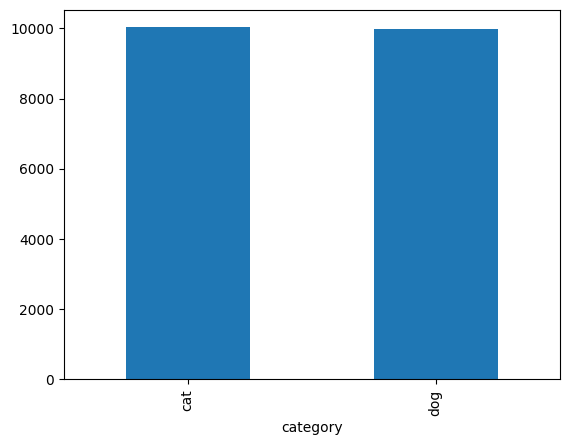

In [39]:
train_df['category'].value_counts().plot.bar()

In [40]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [41]:
train_datagen = ImageDataGenerator(
    rotation_range=15, # 15도 회전
    rescale=1./255,
    shear_range=0.1, # 반시계 방향으로 밀리는 형태(직접 해보면 알 수 있음)
    zoom_range=0.2, # 확대 비율
    horizontal_flip=True, # 좌우 반전
    width_shift_range=0.1, # 가로 비율 이동
    height_shift_range=0.1 # 세로 비율 이동
) # 이미지 데이터를 생성함(주로 이미지가 부족한 상황에 사용)
# 데이터 전처리 및 증식을 동시에 하므로 편함

train_generator = train_datagen.flow_from_dataframe( # DataFrame으로 되어 있는 데이터를 받아 데이터 증식
    train_df, "train/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE, # 원본 이미지와 동일한 사이즈여야 함
    class_mode='categorical', # binary도 사용 가능(이진 분류일 경우)
    batch_size=batch_size
)
# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

Found 20000 validated image filenames belonging to 2 classes.


In [42]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    "train/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)
# 중요한 것은 훈련용으로만 증식데이터를 사용하고 사용된 데이터는 삭제됨

Found 5000 validated image filenames belonging to 2 classes.


In [43]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df,
    "train/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


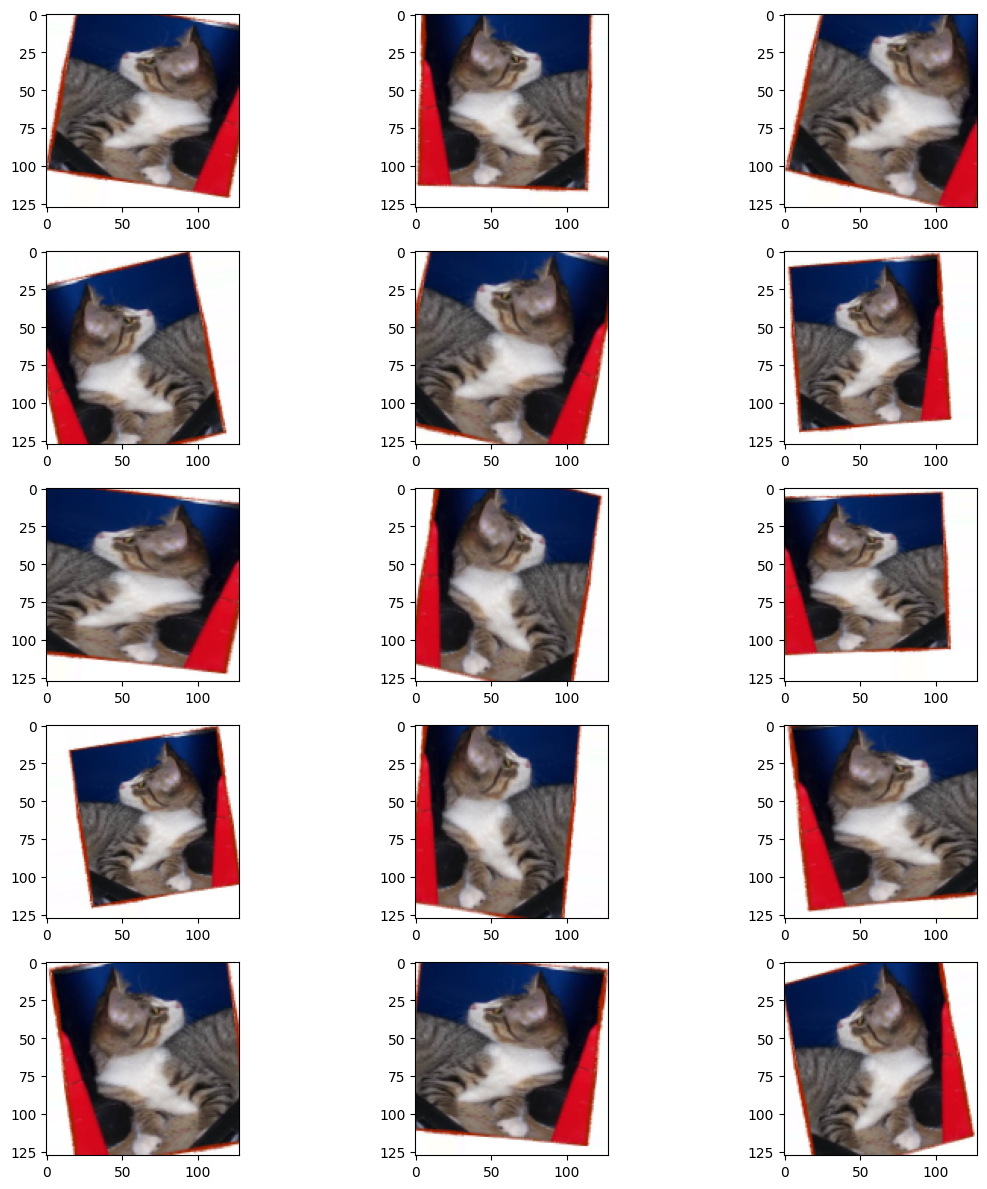

In [44]:
# 이미지 증식
plt.figure(figsize=(12, 12))
for i in range(0, 15): # 총 15개 이미지 생성
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show() # 가상으로 만들어진 이미지 출력

In [46]:
FAST_RUN = True

In [47]:
epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

<ipython-input-47-63cb34b6e89a>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/3
1333/1333 [==============================] - ETA: 0s - loss: 0.5528 - accuracy: 0.7288

1333/1333 [==============================] - 159s 119ms/step - loss: 0.5528 - accuracy: 0.7288 - val_loss: 0.8171 - val_accuracy: 0.6867 - lr: 0.0010
Epoch 2/3
1333/1333 [==============================] - ETA: 0s - loss: 0.4988 - accuracy: 0.7646

1333/1333 [==============================] - 155s 116ms/step - loss: 0.4988 - accuracy: 0.7646 - val_loss: 0.5890 - val_accuracy: 0.7407 - lr: 0.0010
Epoch 3/3
1333/1333 [==============================] - ETA: 0s - loss: 0.4636 - accuracy: 0.7869

1333/1333 [==============================] - 165s 124ms/step - loss: 0.4636 - accuracy: 0.7869 - val_loss: 1.7067 - val_accuracy: 0.6426 - lr: 0.0010


In [48]:
model.save_weights("model.h5")

In [52]:
history.history

{'loss': [0.5527639389038086, 0.49875301122665405, 0.46361151337623596],
 'accuracy': [0.7287966012954712, 0.7646234631538391, 0.7868901491165161],
 'val_loss': [0.8171399235725403, 0.5889724493026733, 1.7067416906356812],
 'val_accuracy': [0.6866866946220398, 0.7407407164573669, 0.642642617225647],
 'lr': [0.001, 0.001, 0.001]}

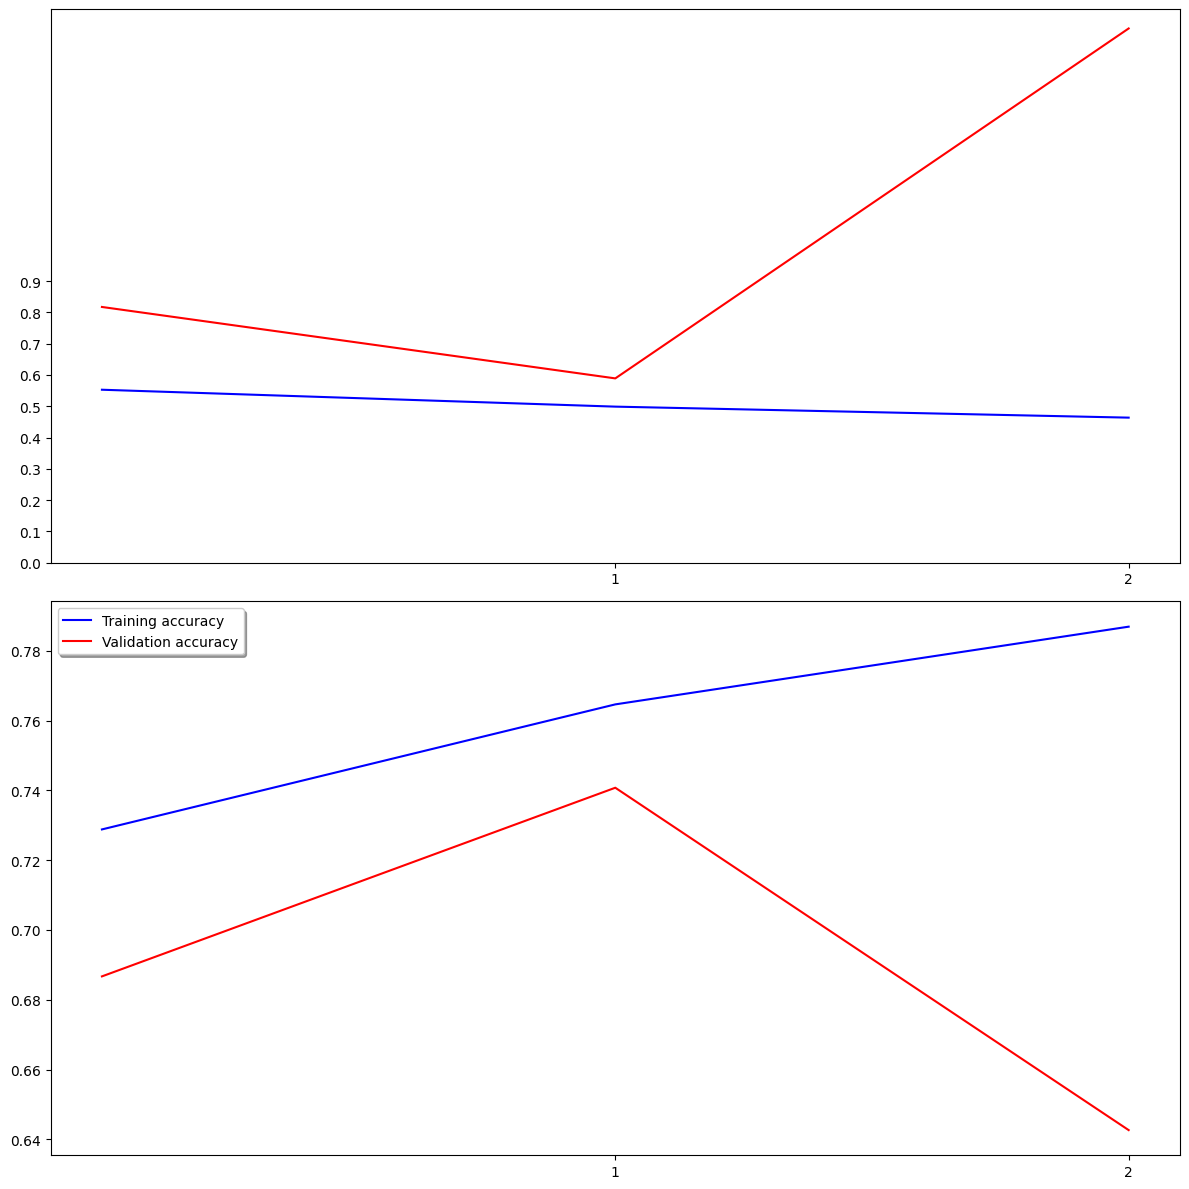

In [53]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [54]:
test_filenames = os.listdir("test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [55]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df,
    "test1/",
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 12500 validated image filenames.


In [56]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

<ipython-input-56-52619fd72ccc>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))


In [57]:
test_df['category'] = np.argmax(predict, axis=-1)

In [58]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

In [59]:
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

<Axes: xlabel='category'>

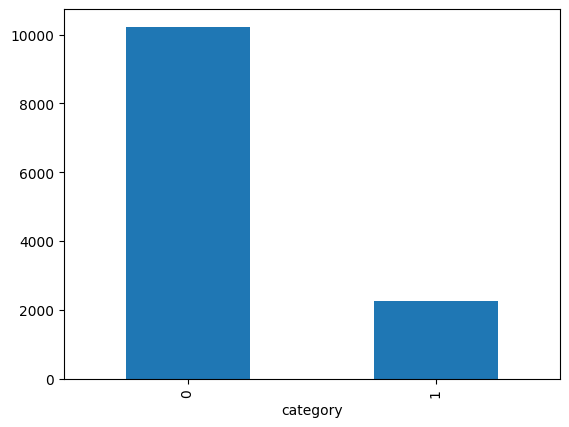

In [60]:
test_df['category'].value_counts().plot.bar()

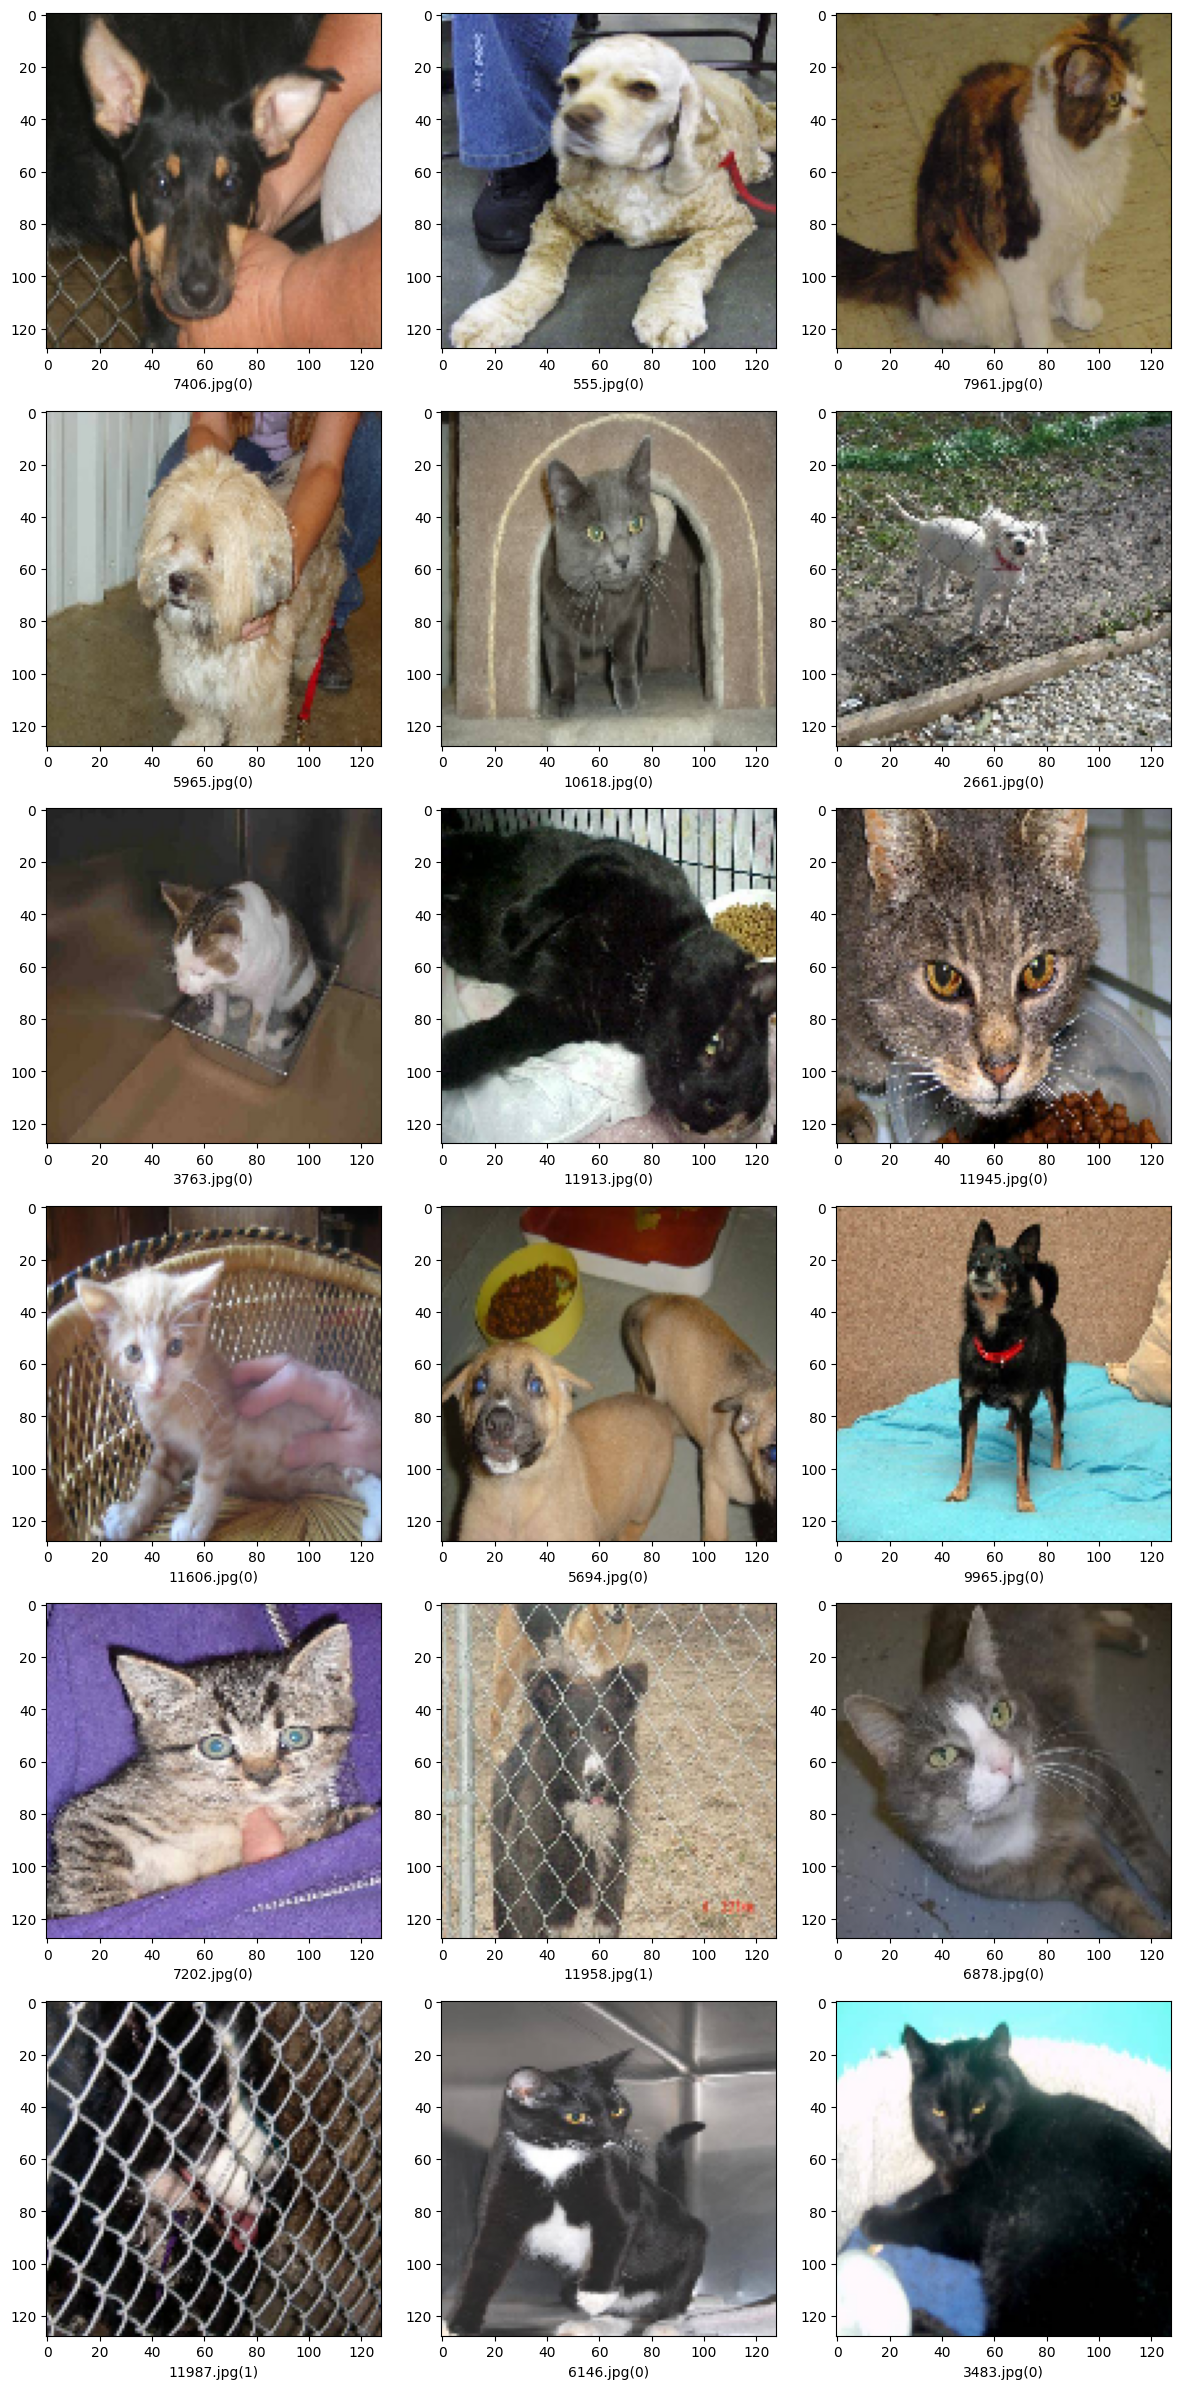

In [62]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("test1/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [63]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)